# Améliorez le produit IA de votre start-up

## Analyser les commentaires pour détecter les différents sujets d’insatisfaction

## Vérification des versions

In [1]:
pip install yellowbrick

  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
Note: you may need to restart the kernel to use updated packages.


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

catboost 0.26.1 requires graphviz, which is not installed.
tensorflow-gpu 2.7.0 requires tensorflow-estimator<2.8,~=2.7.0rc0, but you'll have tensorflow-estimator 2.6.0 which is incompatible.
tensorflow 2.6.0 requires h5py~=3.1.0, but you'll have h5py 3.6.0 which is incompatible.
tensorflow 2.6.0 requires wrapt~=1.12.1, but you'll have wrapt 1.13.3 which is incompatible.
pyldavis 3.3.1 requires numpy>=1.20.0, but you'll have numpy 1.19.5 which is incompatible.
apollo 4.2.13 requires cachetools<4, but you'll have cachetools 4.2.2 which is incompatible.


In [2]:
!pip install pyLDAvis

  Using cached numpy-1.21.5-cp38-cp38-win_amd64.whl (14.0 MB)


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

catboost 0.26.1 requires graphviz, which is not installed.
tensorflow-gpu 2.7.0 requires tensorflow-estimator<2.8,~=2.7.0rc0, but you'll have tensorflow-estimator 2.6.0 which is incompatible.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you'll have numpy 1.21.5 which is incompatible.
tensorflow 2.6.0 requires h5py~=3.1.0, but you'll have h5py 3.6.0 which is incompatible.
tensorflow 2.6.0 requires numpy~=1.19.2, but you'll have numpy 1.21.5 which is incompatible.
tensorflow 2.6.0 requires wrapt~=1.12.1, but you'll have wrapt 1.13.3 which is incompatible.
apollo 4.2.13 requires cachetools<4, but you'll have cachetools 4.2.2 which is incompatible.


  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


In [3]:
# nltk
import nltk
print(nltk.__version__)

C:\Users\JK253\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\JK253\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\JK253\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


3.5


In [4]:
# gensim
import gensim
print(gensim.__version__)

3.8.3


## importation de la base de données

In [5]:
# Charger le dossier par défaut
import os
os.chdir('C:/Users/JK253/Documents/Ingenieur IA/P6')

In [6]:
# Importation du fichier
import pandas
D = pandas.read_csv('P6_01_fichiercsv_02.csv')
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    613 non-null    object
 1   stars   613 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.7+ KB


In [7]:
D.head()

,text,stars
0,*yawn* This is the forgettable sort of bar th...,2
1,"Ordered all veggies, because of my clean eatin...",1
2,I used to love this place. I ordered the honey...,2
3,"When I was at Babson, there was a big controve...",1
4,"We ended up at the location in Cambridge, MA j...",2


Pour pouvoir le manipuler, il faut nettoyer le corpus.

## Nuage de mots

In [8]:
from wordcloud import WordCloud, STOPWORDS

In [9]:
wordcloud = WordCloud(                      
    background_color='white',
    stopwords=STOPWORDS,
    max_words=200,
    max_font_size=40, 
    random_state=42).generate(str(D['text']))

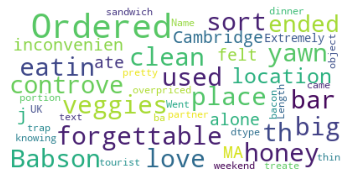

In [10]:
import matplotlib.pyplot as plt
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

Le nuage de mots est une très bonne technique de départ pour vérifier les mots qui apparaisse le plus souvent sur nos différents avis d’insatisfaction des clients, on constate que la langue utiliser est l’anglais et qu’il y a quelque mots inférieurs à 3 lettres.

## Nettoyer le corpus

In [11]:
corpus = D['text'].tolist()
print(corpus[0])

*yawn*  This is the forgettable sort of bar that you wish you hadn't wasted the neurons trying to forget.

The couple times I've been here it was awkwardly empty, and the people who were there were just off.

Awkward bar clientele roll call:
* Old creeper staring from across the bar. (PS: axe murderer or misplaced lust?)
* One excessively drunk single woo girl.
* Excessively drunk single woo girl's 3 ex-frat boy "friends" who keep buying her drinks.
* Man eating alone in the booth behind you.
* Guy watching TV alone. Shouts frequently at it.

I'm not a particular fan, so I wouldn't recommend it. There are better suburb bars in the area. For what it's worth, the connected restaurant, Chi Thai, is very good.


**J'ai afficher le premier document du corpus**

In [12]:
# Passer en minuscule
corpus = [doc.lower() for doc in corpus]
print(corpus[0])

*yawn*  this is the forgettable sort of bar that you wish you hadn't wasted the neurons trying to forget.

the couple times i've been here it was awkwardly empty, and the people who were there were just off.

awkward bar clientele roll call:
* old creeper staring from across the bar. (ps: axe murderer or misplaced lust?)
* one excessively drunk single woo girl.
* excessively drunk single woo girl's 3 ex-frat boy "friends" who keep buying her drinks.
* man eating alone in the booth behind you.
* guy watching tv alone. shouts frequently at it.

i'm not a particular fan, so i wouldn't recommend it. there are better suburb bars in the area. for what it's worth, the connected restaurant, chi thai, is very good.


**Cette étape me permet de passer tout les documents en minuscule et de les basculer dans une liste de mon corpus**

In [13]:
# Liste des ponctuations
import string
ponctuations = list(string.punctuation)
print(ponctuations)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


**J'ai récupéré la ponctuation que je mets dans une structure de liste**

In [14]:
# Retrait des ponctuations
corpus = ["".join([char for char in list(doc) if not (char in ponctuations)]) for doc in corpus]
print(corpus[0])

yawn  this is the forgettable sort of bar that you wish you hadnt wasted the neurons trying to forget

the couple times ive been here it was awkwardly empty and the people who were there were just off

awkward bar clientele roll call
 old creeper staring from across the bar ps axe murderer or misplaced lust
 one excessively drunk single woo girl
 excessively drunk single woo girls 3 exfrat boy friends who keep buying her drinks
 man eating alone in the booth behind you
 guy watching tv alone shouts frequently at it

im not a particular fan so i wouldnt recommend it there are better suburb bars in the area for what its worth the connected restaurant chi thai is very good


**pour chaque document dans le corpus, je le passe en liste de caractére et pour chaque liste de caractére que représente le document je regarde si il fait pas partie des ponctuations, si il fait partie des ponctuations, je ne le renvoie pas, et si il ne fait pas partie des ponctuations là il est renvoyé et par la suite tout celà est mis dans une liste. A ce stade j'ai une liste de caractére, pour reformer la chaine de caractére j'effectue un join. Pour finir je me retrouve avec plusieurs liste de documents avec une disparition de la ponctuation**

In [15]:
# Nécessité de punkt - modèle de tokénisation
# A charger en ligne si ce n'est pas déjà fait
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JK253\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Instalation de l'outils punkt pour la tokénisation**

In [16]:
# Transformer le corpus en liste de listes(les documents)
# Par tokénisation
from nltk.tokenize import word_tokenize
corpus_tk = [word_tokenize(doc) for doc in corpus]
# Avant
print(corpus[0])
# Après tokénisation
print('\n')
print(corpus_tk[0])

yawn  this is the forgettable sort of bar that you wish you hadnt wasted the neurons trying to forget

the couple times ive been here it was awkwardly empty and the people who were there were just off

awkward bar clientele roll call
 old creeper staring from across the bar ps axe murderer or misplaced lust
 one excessively drunk single woo girl
 excessively drunk single woo girls 3 exfrat boy friends who keep buying her drinks
 man eating alone in the booth behind you
 guy watching tv alone shouts frequently at it

im not a particular fan so i wouldnt recommend it there are better suburb bars in the area for what its worth the connected restaurant chi thai is very good


['yawn', 'this', 'is', 'the', 'forgettable', 'sort', 'of', 'bar', 'that', 'you', 'wish', 'you', 'hadnt', 'wasted', 'the', 'neurons', 'trying', 'to', 'forget', 'the', 'couple', 'times', 'ive', 'been', 'here', 'it', 'was', 'awkwardly', 'empty', 'and', 'the', 'people', 'who', 'were', 'there', 'were', 'just', 'off', 'awkw

**J'ai pris chaque document du corpus et je l'ai tokénizer, de plus l'outils punkt de nltk me permet de bien gérer les espaces**

In [17]:
# Importation librairie pour lemmatisation
# A charger en ligne si ce n'est pas déjà fait
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\JK253\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Instalation de l'outils wordnet pour la lemmatisation. Parfois j'ai des mots en singulier ou au pluriel qui renvoie la même idée et on va en venir à la forme canonique. La forme canonique d'un mot est de renvoyer un verbe à l'infinitif de ses différentes conjugaisons afin de réduire la taille du dictionnaire.**

In [18]:
# Lemmatisation
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
corpus_lm = [[lem.lemmatize(mot) for mot in doc] for doc in corpus_tk]
print(corpus_lm[0])

['yawn', 'this', 'is', 'the', 'forgettable', 'sort', 'of', 'bar', 'that', 'you', 'wish', 'you', 'hadnt', 'wasted', 'the', 'neuron', 'trying', 'to', 'forget', 'the', 'couple', 'time', 'ive', 'been', 'here', 'it', 'wa', 'awkwardly', 'empty', 'and', 'the', 'people', 'who', 'were', 'there', 'were', 'just', 'off', 'awkward', 'bar', 'clientele', 'roll', 'call', 'old', 'creeper', 'staring', 'from', 'across', 'the', 'bar', 'p', 'axe', 'murderer', 'or', 'misplaced', 'lust', 'one', 'excessively', 'drunk', 'single', 'woo', 'girl', 'excessively', 'drunk', 'single', 'woo', 'girl', '3', 'exfrat', 'boy', 'friend', 'who', 'keep', 'buying', 'her', 'drink', 'man', 'eating', 'alone', 'in', 'the', 'booth', 'behind', 'you', 'guy', 'watching', 'tv', 'alone', 'shout', 'frequently', 'at', 'it', 'im', 'not', 'a', 'particular', 'fan', 'so', 'i', 'wouldnt', 'recommend', 'it', 'there', 'are', 'better', 'suburb', 'bar', 'in', 'the', 'area', 'for', 'what', 'it', 'worth', 'the', 'connected', 'restaurant', 'chi', 'th

**Ce que je constate dans cette étape est que le pluriel a été mis au singulier, ce qui me réduit la taille du dictionnaire en étant moins brutale que la stématization**

In [19]:
# Importer la librairie des stopwords
# A charger en ligne si ce n'est pas déjà fait
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JK253\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
# Charger les stopwords
from nltk.corpus import stopwords
mots_vides = stopwords.words('english')
print(mots_vides)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
# Compléter la liste des stopwords
# Avec les termes propres au restaurant
mots_vides.extend(['bar', 'restaurant'])
print(mots_vides)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [22]:
# Supression des mots-vides
corpus_sw = [[mot for mot in doc if not mot in mots_vides] for doc in corpus_lm]
# Vérification - origine
print(corpus_lm[0])
# Sans les stopwords
print('\n')
print(corpus_sw[0])

['yawn', 'this', 'is', 'the', 'forgettable', 'sort', 'of', 'bar', 'that', 'you', 'wish', 'you', 'hadnt', 'wasted', 'the', 'neuron', 'trying', 'to', 'forget', 'the', 'couple', 'time', 'ive', 'been', 'here', 'it', 'wa', 'awkwardly', 'empty', 'and', 'the', 'people', 'who', 'were', 'there', 'were', 'just', 'off', 'awkward', 'bar', 'clientele', 'roll', 'call', 'old', 'creeper', 'staring', 'from', 'across', 'the', 'bar', 'p', 'axe', 'murderer', 'or', 'misplaced', 'lust', 'one', 'excessively', 'drunk', 'single', 'woo', 'girl', 'excessively', 'drunk', 'single', 'woo', 'girl', '3', 'exfrat', 'boy', 'friend', 'who', 'keep', 'buying', 'her', 'drink', 'man', 'eating', 'alone', 'in', 'the', 'booth', 'behind', 'you', 'guy', 'watching', 'tv', 'alone', 'shout', 'frequently', 'at', 'it', 'im', 'not', 'a', 'particular', 'fan', 'so', 'i', 'wouldnt', 'recommend', 'it', 'there', 'are', 'better', 'suburb', 'bar', 'in', 'the', 'area', 'for', 'what', 'it', 'worth', 'the', 'connected', 'restaurant', 'chi', 'th

**Pour chaque document du corpus lémmatizer je regarde si le mot appartient au mot vides, si il n'appartient pas au mot vides, je le garde sinon je l'enléve.**

In [23]:
# Retirer les textes lémmatizer de moins de 3 lettres
corpus_sw = [[mot for mot in doc if len(mot) >=3] for doc in corpus_sw]
print(corpus_sw[0])

['yawn', 'forgettable', 'sort', 'wish', 'hadnt', 'wasted', 'neuron', 'trying', 'forget', 'couple', 'time', 'ive', 'awkwardly', 'empty', 'people', 'awkward', 'clientele', 'roll', 'call', 'old', 'creeper', 'staring', 'across', 'axe', 'murderer', 'misplaced', 'lust', 'one', 'excessively', 'drunk', 'single', 'woo', 'girl', 'excessively', 'drunk', 'single', 'woo', 'girl', 'exfrat', 'boy', 'friend', 'keep', 'buying', 'drink', 'man', 'eating', 'alone', 'booth', 'behind', 'guy', 'watching', 'alone', 'shout', 'frequently', 'particular', 'fan', 'wouldnt', 'recommend', 'better', 'suburb', 'area', 'worth', 'connected', 'chi', 'thai', 'good']


**A cet instant afin de simplifier les choses on va garder les mots supérieur au égale à 3 caractéres.**

In [24]:
# Construction d'un dictionnaire des tokens
from gensim.corpora import Dictionary
dico = Dictionary(corpus_sw)
print(dico)

Dictionary(6031 unique tokens: ['across', 'alone', 'area', 'awkward', 'awkwardly']...)


In [25]:
# Représentation bag of words des documents
corpus_bow = [dico.doc2bow(doc) for doc in corpus_sw]
# Vérification
print(sorted(corpus_sw[0]))
# Et en bag of word
print('\n')
print(corpus_bow[0])

['across', 'alone', 'alone', 'area', 'awkward', 'awkwardly', 'axe', 'behind', 'better', 'booth', 'boy', 'buying', 'call', 'chi', 'clientele', 'connected', 'couple', 'creeper', 'drink', 'drunk', 'drunk', 'eating', 'empty', 'excessively', 'excessively', 'exfrat', 'fan', 'forget', 'forgettable', 'frequently', 'friend', 'girl', 'girl', 'good', 'guy', 'hadnt', 'ive', 'keep', 'lust', 'man', 'misplaced', 'murderer', 'neuron', 'old', 'one', 'particular', 'people', 'recommend', 'roll', 'shout', 'single', 'single', 'sort', 'staring', 'suburb', 'thai', 'time', 'trying', 'wasted', 'watching', 'wish', 'woo', 'woo', 'worth', 'wouldnt', 'yawn']


[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), 

## Définir les fonction de nettoyage

In [26]:
#*****************************************
# Préparation des librairie et des outils
# pour le nettoyage des documents
#*****************************************

# Expressions régulières
import re

# Pontuations
import string
ponctuations = list(string.punctuation)
print(ponctuations)

# Tokénisation
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Lemmatisation
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

# Charger les stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
mots_vides = stopwords.words('english')
print('\n')
print(mots_vides)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'wh

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JK253\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\JK253\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JK253\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
# fonction pour nettoyage de chaque document
# tweet = corps du tweet = document
# ponctuations : liste des ponctuations
# stopwords : liste des stopwords à retirer
# lem : fonction pour la lemmatisation des termes

def clean_text(text, ponctuations, stopwords, lem):
    # Harmonisation de la casse
    temp = text.lower()
    # retier les contractions en anglais
    temp = re.sub("'", "", temp)
    # retrait des @
    temp = re.sub("@[A-Za-z0-9_]+", "", temp)
    # retrait des #
    temp = re.sub("#[A-Za-z0-9_]+", "", temp)
    # retrait des liens web (http et https)
    temp = re.sub(r'http\S+','', temp)
    # retrait des ponctuations
    temp = "".join([char for char in list(temp) if not (char in ponctuations)])
    # retrait des nombres
    temp = re.sub("[0-9]", "", temp)
    # tokénisation
    temp = word_tokenize(temp)
    # lemmatisation des termes
    temp = [lem.lemmatize(mot) for mot in temp]
    # retrait des stopwords
    temp = [mot for mot in temp if not mot in stopwords]
    # retirer les tokens de moins de 3 caractères
    temp = [mot for mot in temp if len(mot) >= 3]
    return temp

In [28]:
# Appliquer le nettoyage au corpus
corpus = list(D.text)
corpus = [clean_text(doc, ponctuations, mots_vides, lem) for doc in corpus]

In [29]:
corpus[0]

['yawn',
 'forgettable',
 'sort',
 'bar',
 'wish',
 'hadnt',
 'wasted',
 'neuron',
 'trying',
 'forget',
 'couple',
 'time',
 'ive',
 'awkwardly',
 'empty',
 'people',
 'awkward',
 'bar',
 'clientele',
 'roll',
 'call',
 'old',
 'creeper',
 'staring',
 'across',
 'bar',
 'axe',
 'murderer',
 'misplaced',
 'lust',
 'one',
 'excessively',
 'drunk',
 'single',
 'woo',
 'girl',
 'excessively',
 'drunk',
 'single',
 'woo',
 'girl',
 'exfrat',
 'boy',
 'friend',
 'keep',
 'buying',
 'drink',
 'man',
 'eating',
 'alone',
 'booth',
 'behind',
 'guy',
 'watching',
 'alone',
 'shout',
 'frequently',
 'particular',
 'fan',
 'wouldnt',
 'recommend',
 'better',
 'suburb',
 'bar',
 'area',
 'worth',
 'connected',
 'restaurant',
 'chi',
 'thai',
 'good']

In [30]:
#reformer les documents sous forme de chaîne
documents = [" ".join(doc) for doc in corpus]
print(documents[0])

yawn forgettable sort bar wish hadnt wasted neuron trying forget couple time ive awkwardly empty people awkward bar clientele roll call old creeper staring across bar axe murderer misplaced lust one excessively drunk single woo girl excessively drunk single woo girl exfrat boy friend keep buying drink man eating alone booth behind guy watching alone shout frequently particular fan wouldnt recommend better suburb bar area worth connected restaurant chi thai good


In [31]:
# Nouvelle dataframe
df = pandas.DataFrame({'score': D.stars,'text': documents})
print("avant:.........")
D.head(10)

avant:.........


,text,stars
0,*yawn* This is the forgettable sort of bar th...,2
1,"Ordered all veggies, because of my clean eatin...",1
2,I used to love this place. I ordered the honey...,2
3,"When I was at Babson, there was a big controve...",1
4,"We ended up at the location in Cambridge, MA j...",2
5,Back in 2002 I remember having a macaroni pie ...,2
6,completely less-than mediocre. i had a tomato-...,1
7,This is the first time we ate at Finians under...,1
8,I can't say that I got a warm fuzzy feeling ea...,2
9,"I've never done the bruch, and it seems like t...",2


In [32]:
print("après:.........")
df.head(10)

après:.........


,score,text
0,2,yawn forgettable sort bar wish hadnt wasted ne...
1,1,ordered veggie clean eating regimen returned w...
2,2,used love place ordered honey chicken chewy ed...
3,1,babson big controversy staff racistsimilar div...
4,2,ended location cambridge chance food court lik...
5,2,back remember macaroni pie counter garage food...
6,1,completely lessthan mediocre tomatomozzarella ...
7,1,first time ate finians new management good exp...
8,2,cant say got warm fuzzy feeling eating place d...
9,2,ive never done bruch seems like thats thing pl...


In [33]:
# des documents vides après nettoyage?
print(df.loc[df.text==""].shape[0])

0


In [34]:
# retrait des documents correspondants
df_ok = df.loc[df.text != ""]
print(df_ok.shape)

(613, 2)


## TF IDF

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
vectorizer = TfidfVectorizer(analyzer= 'word',ngram_range=(1,2),stop_words = "english")

In [37]:
tfidf_mat = vectorizer.fit_transform(df_ok.text)

In [38]:
feature_names = vectorizer.get_feature_names()

C:\Users\JK253\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
dense = tfidf_mat.todense()
denselist = dense.tolist()

In [40]:
df_tfidf = pandas.DataFrame(denselist, columns=feature_names)
print(df_tfidf.shape)

(613, 31882)


## Réduction de dimension PCA
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)

In [41]:
from sklearn import manifold, decomposition
print("Dimensions dataset avant réduction PCA : ", df_tfidf.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(df_tfidf)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (613, 31882)
Dimensions dataset après réduction PCA :  (613, 604)


### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D 

In [42]:
tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pandas.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
print(df_tsne.shape)

C:\Users\JK253\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(613, 2)


## Comparer 4 modéles (K-Means, LDA, LDA mallet et NMF)

In [43]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans

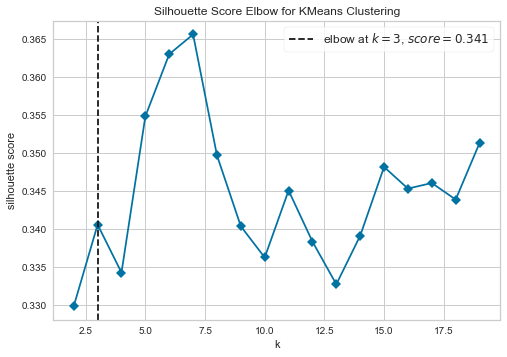

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [44]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)

visualizer.fit(df_tsne)   
visualizer.poof() 

### Le modéle K-Means choisie avec 3 clusters

In [65]:
model_kmeans_choisie = KMeans(3)

## LDA

### Effectuer une analyse comparative pour déterminer la meilleure valeur de K(sujet) à l’aide du cohérence score pour le modèle LDA

In [45]:
from gensim.models import CoherenceModel
def compute_coherence_values_lda(corpus, texts, limit=18, start=1, step=1):
  
    coherence_values_lda = []
    model_list_lda = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus_bow,
                                           id2word=dico,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list_lda.append(model)
        coherencemodel = CoherenceModel(model=model, texts=corpus_sw, coherence='c_v')
        coherence_values_lda.append(coherencemodel.get_coherence())

    return model_list_lda, coherence_values_lda

In [46]:
model_list_lda, coherence_values_lda = compute_coherence_values_lda(corpus=corpus_bow, texts=corpus, start=1, limit=18, step=1)

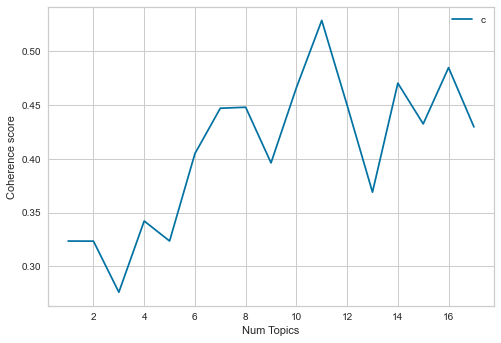

In [47]:
# Afficher le graphique
limit=18; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values_lda)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [48]:
for m, cv in zip(x, coherence_values_lda):
    print("Num Topics =", m, "à une valeur de cohérence de", round(cv, 4))

Num Topics = 1 à une valeur de cohérence de 0.3236
Num Topics = 2 à une valeur de cohérence de 0.3235
Num Topics = 3 à une valeur de cohérence de 0.2761
Num Topics = 4 à une valeur de cohérence de 0.3422
Num Topics = 5 à une valeur de cohérence de 0.3236
Num Topics = 6 à une valeur de cohérence de 0.4048
Num Topics = 7 à une valeur de cohérence de 0.4469
Num Topics = 8 à une valeur de cohérence de 0.4478
Num Topics = 9 à une valeur de cohérence de 0.3961
Num Topics = 10 à une valeur de cohérence de 0.4659
Num Topics = 11 à une valeur de cohérence de 0.5284
Num Topics = 12 à une valeur de cohérence de 0.4497
Num Topics = 13 à une valeur de cohérence de 0.369
Num Topics = 14 à une valeur de cohérence de 0.4701
Num Topics = 15 à une valeur de cohérence de 0.4323
Num Topics = 16 à une valeur de cohérence de 0.4846
Num Topics = 17 à une valeur de cohérence de 0.4295


Le graphique ci-dessus nous montre que la meilleurs performance se situe entre 10 et 12 sujets, de plus nous voyons que la meilleurs performance est de 11 topics avec une valeur de 0,5284.

### Le modéle LDA choisie avec 11 topics

In [49]:
model_LDA_choisie = gensim.models.ldamodel.LdaModel(corpus=corpus_bow,
                                           id2word=dico,
                                           num_topics=11, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

## LDA mallet

### Effectuer une analyse comparative pour déterminer la meilleure valeur de K(sujet) à l’aide du cohérence score pour le modèle LDA mallet

In [50]:
os.environ.update({'MALLET_HOME':r'C:/mallet-2.0.8'})

In [51]:
mallet_path = 'C:/mallet-2.0.8/bin/mallet'

In [52]:
def compute_coherence_values_mallet(corpus, texts, limit=18, start=1, step=1):
  
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus_bow, num_topics=num_topics, id2word=dico)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [53]:
model_list, coherence_values = compute_coherence_values_mallet(corpus=corpus_bow, texts=corpus, start=1, limit=18, step=1)

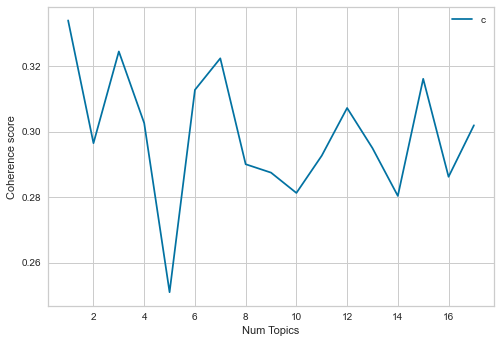

In [54]:
# afficher le graphique
limit=18; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [55]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, "à une valeur de cohérence de", round(cv, 4))

Num Topics = 1 à une valeur de cohérence de 0.334
Num Topics = 2 à une valeur de cohérence de 0.2965
Num Topics = 3 à une valeur de cohérence de 0.3245
Num Topics = 4 à une valeur de cohérence de 0.3026
Num Topics = 5 à une valeur de cohérence de 0.2509
Num Topics = 6 à une valeur de cohérence de 0.3128
Num Topics = 7 à une valeur de cohérence de 0.3224
Num Topics = 8 à une valeur de cohérence de 0.29
Num Topics = 9 à une valeur de cohérence de 0.2875
Num Topics = 10 à une valeur de cohérence de 0.2813
Num Topics = 11 à une valeur de cohérence de 0.2927
Num Topics = 12 à une valeur de cohérence de 0.3072
Num Topics = 13 à une valeur de cohérence de 0.295
Num Topics = 14 à une valeur de cohérence de 0.2803
Num Topics = 15 à une valeur de cohérence de 0.3161
Num Topics = 16 à une valeur de cohérence de 0.2862
Num Topics = 17 à une valeur de cohérence de 0.3019


Le graphique ci-dessus nous montre que la meilleurs performance se situe entre 1 et 2 sujets, de plus nous voyons que la meilleurs performance est de 1 topics avec une valeur de 0,334.

### Le modéle LDA_mallet choisie avec 1 topic

In [56]:
model_LDA_mallet_choisie = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus_bow, num_topics=1, id2word=dico)

## NMF

### Effectuer une analyse comparative pour déterminer la meilleure valeur de K(sujet) à l’aide du cohérence score pour le modèle NMF

In [57]:
from gensim.models.nmf import Nmf 

In [60]:
def compute_coherence_values_nmf(corpus, texts, limit=18, start=1, step=1):
  
    coherence_values_nmf = []
    model_list_nmf = []
    for num_topics in range(start, limit, step):
        model = Nmf(corpus=corpus_bow, num_topics=num_topics,
                                      id2word=dico, chunksize=100, passes=10, kappa=1.0,
                                      minimum_probability=0.01, w_max_iter=200, 
                                      w_stop_condition=0.0001, h_max_iter=50, 
                                      h_stop_condition=0.001, eval_every=10, normalize=True, random_state=100)
        model_list_nmf.append(model)
        coherencemodel = CoherenceModel(model=model, texts=corpus_sw, coherence='c_v')
        coherence_values_nmf.append(coherencemodel.get_coherence())

    return model_list_nmf, coherence_values_nmf

In [61]:
model_list_nmf, coherence_values_nmf = compute_coherence_values_nmf(corpus=corpus_bow, texts=corpus, start=1, limit=18, step=1)

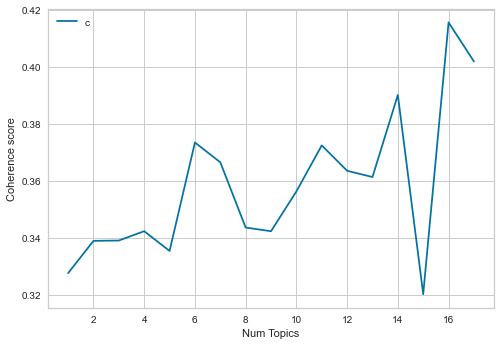

In [62]:
# afficher le graphique
limit=18; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values_nmf)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [63]:
for m, cv in zip(x, coherence_values_nmf):
    print("Num Topics =", m, "à une valeur de cohérence de", round(cv, 4))

Num Topics = 1 à une valeur de cohérence de 0.3277
Num Topics = 2 à une valeur de cohérence de 0.339
Num Topics = 3 à une valeur de cohérence de 0.3392
Num Topics = 4 à une valeur de cohérence de 0.3424
Num Topics = 5 à une valeur de cohérence de 0.3355
Num Topics = 6 à une valeur de cohérence de 0.3735
Num Topics = 7 à une valeur de cohérence de 0.3666
Num Topics = 8 à une valeur de cohérence de 0.3437
Num Topics = 9 à une valeur de cohérence de 0.3424
Num Topics = 10 à une valeur de cohérence de 0.3564
Num Topics = 11 à une valeur de cohérence de 0.3725
Num Topics = 12 à une valeur de cohérence de 0.3636
Num Topics = 13 à une valeur de cohérence de 0.3614
Num Topics = 14 à une valeur de cohérence de 0.3902
Num Topics = 15 à une valeur de cohérence de 0.3204
Num Topics = 16 à une valeur de cohérence de 0.4156
Num Topics = 17 à une valeur de cohérence de 0.4019


Le graphique ci-dessus nous montre que la meilleurs performance se situe entre 15 et 18 sujets, de plus nous voyons que la meilleurs performance est de 16 topics avec une valeur de 0,4156.

### Le modéle NMF choisie avec 16 topics

In [64]:
model_NMF_choisie = gensim.models.nmf.Nmf(corpus=corpus_bow, num_topics=16,
                                      id2word=dico, chunksize=100, passes=10, kappa=1.0,
                                      minimum_probability=0.01, w_max_iter=200, 
                                      w_stop_condition=0.0001, h_max_iter=50, 
                                      h_stop_condition=0.001, eval_every=10, normalize=True, random_state=100)

Le graphique ci-dessus nous montre que la meilleurs performance est de 2 clusters avec une valeur de 0,462.

## La meilleur performance entre K-Means, LDA, LDA mallet et NMF 

* Numéro 1 : model_LDA_choisie 11 topics avec la meilleur performace qui est de 0,5284
* Numéro 2 : model_NMF_choisie 16 topics avec la meilleur performace qui est de 0,4156
* Numéro 3 : model_kmeans_choisie 3 clusters avec la meilleur performace qui est de 0,341
* Numéro 4 : model_LDA_mallet_choisie 1 topic avec la meilleur performace qui est de 0,3334

Alors, comment déduire la sortie de pyLDAvis?

Chaque bulle sur le tracé de gauche représente un sujet. Plus la bulle est grande, plus ce sujet est répandu.

Un bon modèle de sujet aura des bulles assez grandes et sans chevauchement dispersées dans le graphique au lieu d’être regroupées dans un quadrant en l'occurence notre modèle dispose d'un seul chevauchement entre le 10 et 11 topics ce qui en reste acceptable du grand nombre de sujet.

D’accord, si vous déplacez le curseur sur l’une des bulles, les mots et les barres sur le côté droit se mettront à jour. Ces mots sont les mots-clés saillants qui forment le sujet sélectionné.D’accord, si vous déplacez le curseur sur l’une des bulles, les mots et les barres sur le côté droit se mettront à jour. Ces mots sont les mots-clés saillants qui forment le sujet sélectionné.

Ci-dessus nous appercevons le classement des 4 modèles, ce qui en ressort c'est que le modèle LDA avec 11 topics est le meilleur avec un score de 0,5284.

## Visualisation du modéle LDA avec 11 topics

In [66]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(model_LDA_choisie, corpus_bow, dico, mds='mmds')
vis

C:\Users\JK253\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.200856 -0.317685       1        1  46.248058
0      0.356286 -0.074918       2        1  27.951688
8      0.249444  0.178705       3        1  14.730825
10    -0.063900  0.241220       4        1   3.033289
4     -0.086165 -0.142000       5        1   2.279818
5     -0.237085  0.020641       6        1   2.137738
2     -0.152702 -0.062748       7        1   1.892711
9     -0.103292  0.068271       8        1   0.838946
3     -0.050492  0.051259       9        1   0.548881
6     -0.052007  0.019794      10        1   0.197889
7     -0.060942  0.017462      11        1   0.140157, topic_info=          Term        Freq       Total Category  logprob  loglift
147       like  353.000000  353.000000  Default  30.0000  30.0000
239        ate   42.000000   42.000000  Default  29.0000  29.0000
127      staff   60.000000   60.000000  Default  28.0000  28.0000
244       came  134.000000  134.000000  Default  27.0000  27.0000
74       lunch   78.000000   78.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
3187     katsu    0.007885    0.736645  Topic11  -8.7204   2.0330
4008  listened    0.007890    0.739034  Topic11  -8.7197   2.0304
4009   spanish    0.007890    0.739034  Topic11  -8.7197   2.0304
5639      fell    0.008300    0.785566  Topic11  -8.6691   2.0200
4945    hotpot    0.008598    0.825605  Topic11  -8.6338   2.0056

[470 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2126      5  0.973942   abysmal
1324      6  0.795246   account
157       1  0.982659  actually
1325      5  0.665472       add
1325      6  0.166368       add
...     ...       ...       ...
88        2  0.195142     would
88        3  0.088129     would
2125      4  0.898064      yelp
1473      3  0.983821       yet
675       4  0.788452      zero

[473 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 9, 11, 5, 6, 3, 10, 4, 7, 8])

## Affichage les topics

In [67]:
model_LDA_choisie.print_topics()

C:\Users\JK253\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.020*"food" + 0.017*"service" + 0.013*"came" + 0.011*"went" + 0.011*"table" + 0.010*"back" + 0.010*"time" + 0.009*"night" + 0.008*"asked" + 0.008*"said"'),
 (1,
  '0.022*"like" + 0.022*"food" + 0.021*"place" + 0.014*"good" + 0.012*"really" + 0.011*"chicken" + 0.009*"get" + 0.009*"one" + 0.007*"dont" + 0.007*"would"'),
 (2,
  '0.023*"chinese" + 0.017*"putting" + 0.017*"site" + 0.016*"okay" + 0.012*"man" + 0.012*"face" + 0.010*"cute" + 0.009*"miss" + 0.009*"bother" + 0.008*"baby"'),
 (3,
  '0.022*"mushroom" + 0.009*"bennigans" + 0.009*"tour" + 0.009*"fatty" + 0.007*"clam" + 0.005*"hooter" + 0.005*"underwhelming" + 0.005*"utterly" + 0.004*"ravioli" + 0.004*"fucking"'),
 (4,
  '0.032*"steak" + 0.014*"abysmal" + 0.013*"vegetable" + 0.013*"sock" + 0.013*"wet" + 0.011*"interesting" + 0.011*"barely" + 0.010*"anymore" + 0.009*"tasteless" + 0.008*"completely"'),
 (5,
  '0.021*"early" + 0.018*"ignored" + 0.017*"tea" + 0.016*"alone" + 0.016*"surly" + 0.014*"organic" + 0.014*"local" + 0.01

## Mot dominant par topics

* Topics n°0  : Les mots dominant sont 'food et 'service' dont le sujets de cette topic correspond **au service de restauration**
* Topics n°1  : Les mots dominant sont 'like', 'food' et 'place' dont le sujets de cette topic correspond **au lieu où l'on mange** 
* Topics n°2  : Le mot dominant est 'chinese' dont le sujets de cette topic correspond **au site internet compliqué à comprendre** 
* Topics n°3  : Le mot dominant est 'mushroom' dont le sujets de cette topic correspond **au personnel mal organisé** 
* Topics n°4  : Le mot dominant est 'steak' dont le sujets de cette topic correspond **à la nouriture mauvaise** 
* Topics n°5  : Le mot dominant est 'early' dont le sujets de cette topic correspond **au comportement du personnel** 
* Topics n°6  : Le mot dominant est 'pizza' dont le sujets de cette topic correspond **au livraison avec un où plusieurs défaut sur le produit** 
* Topics n°7  : Le mot dominant est 'flat' dont le sujets de cette topic correspond **au gaspillage de nouriture** 
* Topics n°8  : Les mots dominant sont 'business' et 'lunch' dont le sujets de cette topic correspond **à l'ambiance dans le restaurant** 
* Topics n°9  : Le mot dominant est 'soup' dont le sujets de cette topic correspond **au menu bouratif** 
* Topics n°10 : Le mot dominant est 'ate' dont le sujets de cette topic correspond **au menu trop légé** 

In [68]:
# Description des documents dans l'espace des topics
doc_topics = model_LDA_choisie.get_document_topics(corpus_bow)
print(doc_topics)

C:\Users\JK253\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
# Transformation en matrice 'sparse'
from gensim.matutils import corpus2csc
mat_sparse = corpus2csc(doc_topics)
# Vérification
print(mat_sparse[0])

  (0, 0)	0.16596269607543945
  (0, 1)	0.16275520622730255
  (0, 2)	0.21210038661956787
  (0, 3)	0.16106094419956207
  (0, 4)	0.09810364246368408
  (0, 5)	0.05195951834321022
  (0, 6)	0.07630946487188339
  (0, 7)	0.3122498691082001
  (0, 8)	0.13933390378952026
  (0, 9)	0.10038131475448608
  (0, 10)	0.2587060332298279
  (0, 11)	0.3884859085083008
  (0, 12)	0.3453454375267029
  (0, 13)	0.22742590308189392
  (0, 14)	0.17715713381767273
  (0, 15)	0.053365372121334076
  (0, 16)	0.22314447164535522
  (0, 17)	0.10627374053001404
  (0, 18)	0.2692374587059021
  (0, 19)	0.1502942442893982
  (0, 20)	0.07967939972877502
  (0, 21)	0.3187483847141266
  (0, 22)	0.7757916450500488
  (0, 23)	0.1359780728816986
  (0, 24)	0.26719972491264343
  :	:
  (0, 588)	0.30221444368362427
  (0, 589)	0.19235022366046906
  (0, 590)	0.2339097261428833
  (0, 591)	0.3480777144432068
  (0, 592)	0.23076380789279938
  (0, 593)	0.37049371004104614
  (0, 594)	0.18874859809875488
  (0, 595)	0.26393651962280273
  (0, 596)	0.320

C:\Users\JK253\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
# Et en matrice normale
mat_dt = mat_sparse.T.toarray()
print(mat_dt)

[[0.1659627  0.21223429 0.07060549 ... 0.22586015 0.         0.        ]
 [0.16275521 0.35149193 0.         ... 0.21547094 0.         0.        ]
 [0.21210039 0.44678554 0.         ... 0.05477973 0.         0.05301293]
 ...
 [0.5626322  0.24038951 0.         ... 0.05243786 0.         0.10965811]
 [0.68412167 0.15919673 0.01038154 ... 0.05368788 0.         0.01540394]
 [0.48756361 0.32425597 0.01090168 ... 0.08002823 0.         0.06627879]]


C:\Users\JK253\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
# Vérification des dimensions
print(mat_dt.shape)

(613, 11)


C:\Users\JK253\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Trouver le sujet dominant dans les 5 premiers documents

In [72]:
# Création d'une nouvelle data Frame
dfTopic = pandas.DataFrame(mat_dt, columns=["Sujet "+str(i) for i in range(mat_dt.shape[1])])
# Vérification
print(dfTopic.head(5))

    Sujet 0   Sujet 1   Sujet 2  Sujet 3   Sujet 4   Sujet 5  Sujet 6  \
0  0.165963  0.212234  0.070605      0.0  0.000000  0.315214      0.0   
1  0.162755  0.351492  0.000000      0.0  0.222327  0.000000      0.0   
2  0.212100  0.446786  0.000000      0.0  0.089836  0.000000      0.0   
3  0.161061  0.326663  0.000000      0.0  0.453756  0.000000      0.0   
4  0.098104  0.841378  0.000000      0.0  0.000000  0.000000      0.0   

    Sujet 7   Sujet 8  Sujet 9  Sujet 10  
0  0.000000  0.225860      0.0  0.000000  
1  0.025544  0.215471      0.0  0.000000  
2  0.120544  0.054780      0.0  0.053013  
3  0.000000  0.033856      0.0  0.000000  
4  0.000000  0.029977      0.0  0.000000  


C:\Users\JK253\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


* **Le document 0** est le plus représenté dans **le sujet 5** qui correspond **au comportement du personnel** 
* **Le document 1** est le plus représenté dans **le sujet 1** qui correspond **au lieu où l'on mange** 
* **Le document 2** est le plus représenté dans **le sujet 1** qui correspond **au lieu où l'on mange**
* **Le document 3** est le plus représenté dans **le sujet 4** qui correspond **au viande et au lègume qui ne sont pas bonne**
* **Le document 4** est le plus représenté dans **le sujet 1** qui correspond **au lieu où l'on mange**

## Prédire le sujet d'un texte

### Texte brute

In [73]:
test_text = D['text'][1]
test_text

C:\Users\JK253\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Ordered all veggies, because of my clean eating regimen and as I returned to work from my 1hr lunch I discovered that ALL my veggies were literally swimming in OIL & GREASE!!! I was more than pissed, but knew it would be a lost effort to attempt to take anything back. I did in turn call the business and make a complaint. Wont return. #LostCustomer'

### En minuscule, enlévement des ponctuation, tokénization du texte

In [74]:
test_text_tk = corpus_tk[1]
test_text_tk

C:\Users\JK253\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['ordered',
 'all',
 'veggies',
 'because',
 'of',
 'my',
 'clean',
 'eating',
 'regimen',
 'and',
 'as',
 'i',
 'returned',
 'to',
 'work',
 'from',
 'my',
 '1hr',
 'lunch',
 'i',
 'discovered',
 'that',
 'all',
 'my',
 'veggies',
 'were',
 'literally',
 'swimming',
 'in',
 'oil',
 'grease',
 'i',
 'was',
 'more',
 'than',
 'pissed',
 'but',
 'knew',
 'it',
 'would',
 'be',
 'a',
 'lost',
 'effort',
 'to',
 'attempt',
 'to',
 'take',
 'anything',
 'back',
 'i',
 'did',
 'in',
 'turn',
 'call',
 'the',
 'business',
 'and',
 'make',
 'a',
 'complaint',
 'wont',
 'return',
 'lostcustomer']

### Lematization du texte tokénizer

In [75]:
test_text_lm = corpus_lm[1]
test_text_lm

C:\Users\JK253\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['ordered',
 'all',
 'veggie',
 'because',
 'of',
 'my',
 'clean',
 'eating',
 'regimen',
 'and',
 'a',
 'i',
 'returned',
 'to',
 'work',
 'from',
 'my',
 '1hr',
 'lunch',
 'i',
 'discovered',
 'that',
 'all',
 'my',
 'veggie',
 'were',
 'literally',
 'swimming',
 'in',
 'oil',
 'grease',
 'i',
 'wa',
 'more',
 'than',
 'pissed',
 'but',
 'knew',
 'it',
 'would',
 'be',
 'a',
 'lost',
 'effort',
 'to',
 'attempt',
 'to',
 'take',
 'anything',
 'back',
 'i',
 'did',
 'in',
 'turn',
 'call',
 'the',
 'business',
 'and',
 'make',
 'a',
 'complaint',
 'wont',
 'return',
 'lostcustomer']

### Supprimer les mots vides et retirer les mots du texte lémmatizer de moins de 3 lettres

In [76]:
test_text_sw = corpus_sw[1]
test_text_sw

C:\Users\JK253\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['ordered',
 'veggie',
 'clean',
 'eating',
 'regimen',
 'returned',
 'work',
 '1hr',
 'lunch',
 'discovered',
 'veggie',
 'literally',
 'swimming',
 'oil',
 'grease',
 'pissed',
 'knew',
 'would',
 'lost',
 'effort',
 'attempt',
 'take',
 'anything',
 'back',
 'turn',
 'call',
 'business',
 'make',
 'complaint',
 'wont',
 'return',
 'lostcustomer']

### Représentation bag of words du test_text_sw

In [77]:
test_text_bow = corpus_bow[1]
test_text_bow

C:\Users\JK253\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(11, 1),
 (19, 1),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 1),
 (68, 1),
 (69, 1),
 (70, 1),
 (71, 1),
 (72, 1),
 (73, 1),
 (74, 1),
 (75, 1),
 (76, 1),
 (77, 1),
 (78, 1),
 (79, 1),
 (80, 1),
 (81, 1),
 (82, 1),
 (83, 1),
 (84, 1),
 (85, 2),
 (86, 1),
 (87, 1),
 (88, 1)]

### Prédiction du topics correspondant au texte brute

In [78]:
# Description du texte dans l'espace des topics
doc_topics_test = model_LDA_choisie.get_document_topics(test_text_bow)
print(doc_topics_test)

[(0, 0.16274282), (1, 0.35151204), (4, 0.222328), (7, 0.02554437), (8, 0.21546227)]


C:\Users\JK253\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Le topic 1 représente la pédiction du sujet du texte avec le poids le plus élevé égale à environ 0,3515 qui correspond **au lieu où l'on mange**.